# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных: Использую # spotify

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv('spotify/SpotifyFeatures.csv')

In [3]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
pd.isnull(spotify).sum().sum() # нет значений типа null.

0

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

***

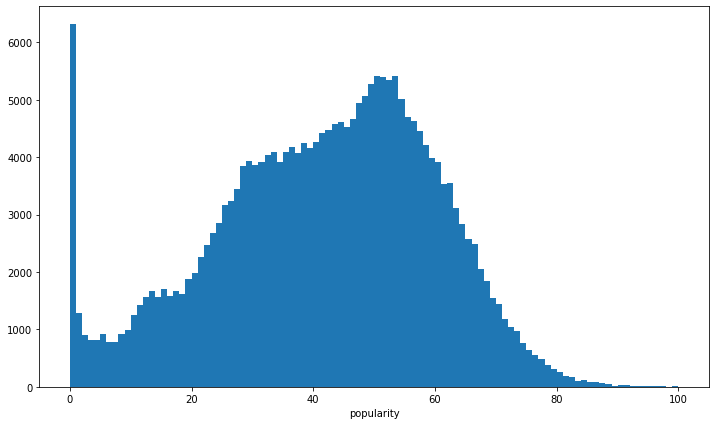

In [30]:
# Распределение популярности.
plt.hist(spotify.popularity, bins = 100)
plt.xlabel('popularity')
plt.show()

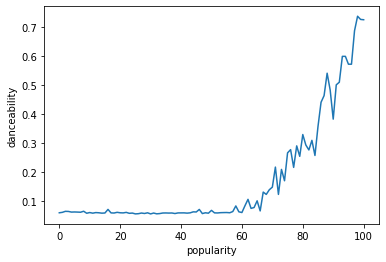

In [7]:
# Гипотеза, чем популярнее трек, тем он более танцевальный.
df = spotify.groupby('popularity').min()
plt.plot(df.loc[ : , df.columns == 'danceability' ])
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()
# Вывод, популярная музыка всегда более подвижна

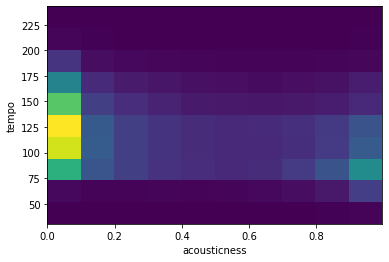

In [8]:
plt.hist2d(spotify.acousticness, spotify.tempo)
plt.xlabel('acousticness')
plt.ylabel('tempo')
plt.show()

Text(0, 0.5, 'tempo')

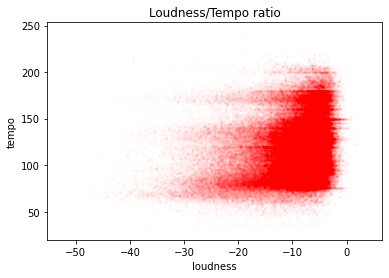

In [9]:
plt.scatter(spotify['loudness'], 
            spotify['tempo'],
            c = [[1, 0, 0, 0.01]],
            s = 3
           )
plt.title('Loudness/Tempo ratio')
plt.xlabel('loudness')
plt.ylabel('tempo')

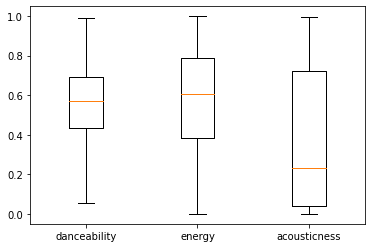

In [10]:
plt.boxplot([spotify.danceability, spotify.energy, spotify.acousticness], labels=['danceability', 'energy', 'acousticness'])
plt.show()

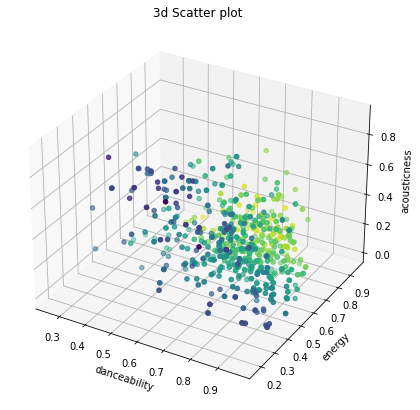

In [11]:
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = (12, 7)

fig = plt.figure()
ax = plt.axes(projection='3d')
popular_tracks = spotify.loc[spotify.popularity > 80]
danceability = popular_tracks.danceability
energy = popular_tracks.energy
acousticness = popular_tracks.acousticness

# Хитрая формула цвета зависит от координат точки
color = [energy]

ax.scatter(danceability, energy, acousticness, c=color)

ax.set_title('3d Scatter plot')
ax.set_xlabel('danceability')
ax.set_ylabel('energy')
ax.set_zlabel('acousticness')

plt.show()

In [12]:
spotify.to_csv('data/spotify_edited.csv')

In [13]:
spotify['is_popular'] = spotify['popularity'] >= 75

In [14]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,is_popular
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,False
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,False
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,False
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,False
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,False


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [15]:
from scipy import interpolate

In [16]:
def function(x):
    return np.sin(x) * np.cos(x) * np.log(x + 1)

In [17]:
np.random.seed(0)

In [18]:
x = np.linspace(0, 10, 1000)

In [19]:
y = function(x)

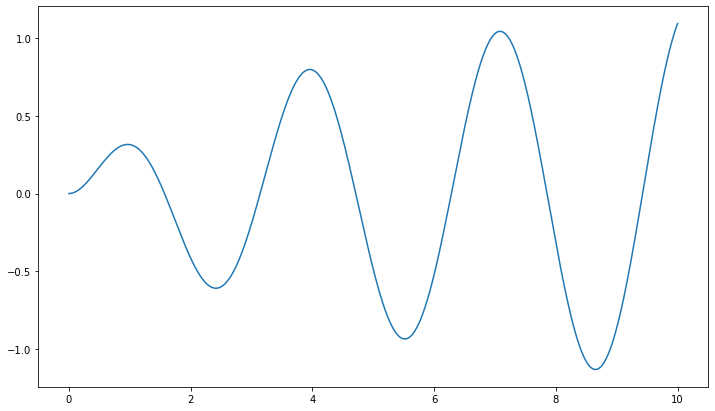

In [20]:
plt.plot(x, y)

https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/interpolate.py#L332-L721

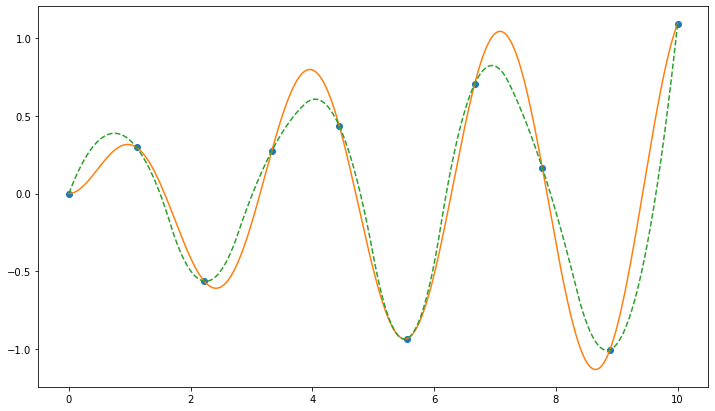

In [21]:
xnew = np.linspace(0, 10, 10)
ynew = function(xnew)
f = interpolate.interp1d(xnew, ynew, kind='quadratic')
plt.plot(xnew, ynew, 'o', x, y, '-', x, f(x), '--')
plt.show()

In [22]:
class lagrange:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def eval(self, x):
        l = []
        for i in range(x.shape[0]):
            tmp = []
            for j in range(self.x.shape[0]):
                newx = self.x[np.arange(self.x.shape[0]) != j]
                tmp.append(((x[i] - newx) / (self.x[j] - newx)).prod())
            l.append(tmp)
        return (self.y * l).sum(axis=1)
    

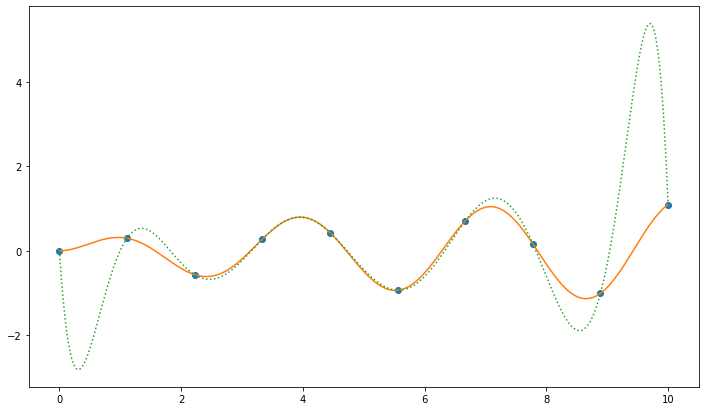

In [23]:
plt.plot(xnew, ynew, 'o', x, y, '-', x, lagrange(xnew, ynew).eval(x), ':')

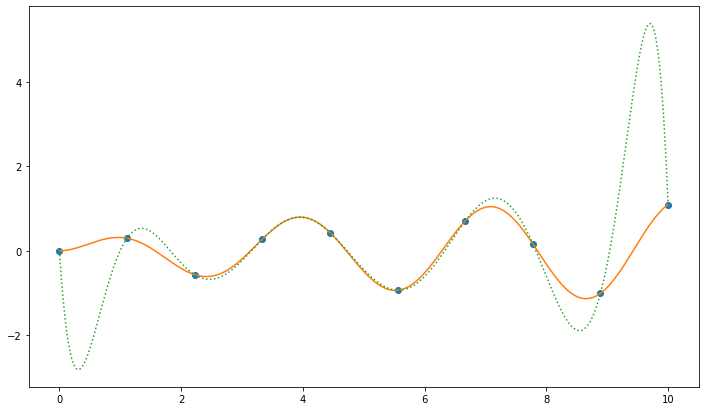

In [24]:
plt.plot(xnew, ynew, 'o', x, y, '-', x, interpolate.lagrange(xnew, ynew)(x), ':')

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 4.]
Названия колонок: [1. 2. 3. 4.]


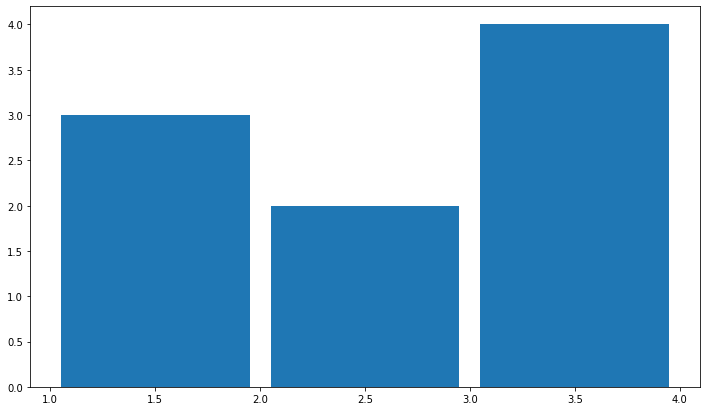

In [25]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=3, 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [72]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_el = min(array)
    max_el = max(array)
    bin_size = (max_el - min_el) / bins
    result = [0] * bins
    for i in array:
        if i == max_el:
            result[bins - 1] += 1
        else:
            result[int((i - min_el) / bin_size)] += 1
    bin_list = np.linspace(min_el, max_el, bins + 1)
    array = np.linspace(min_el+(bin_size/2), max_el-(bin_size/2), bins)
    plt.bar(array, result, width = bin_size - 0.05 * bin_size)
    return result, bin_list

([3, 2, 4], array([1., 2., 3., 4.]))

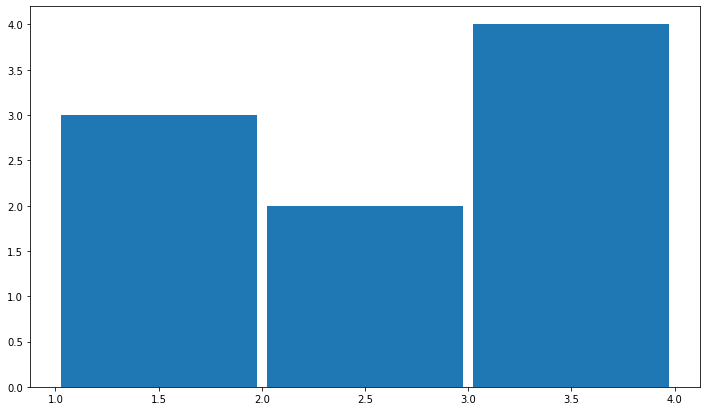

In [76]:
fast_hist([1,1,2,3,4,1,2,3,4], 3)

In [74]:
array = np.random.randint(-10, 10, 100)

8.17 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


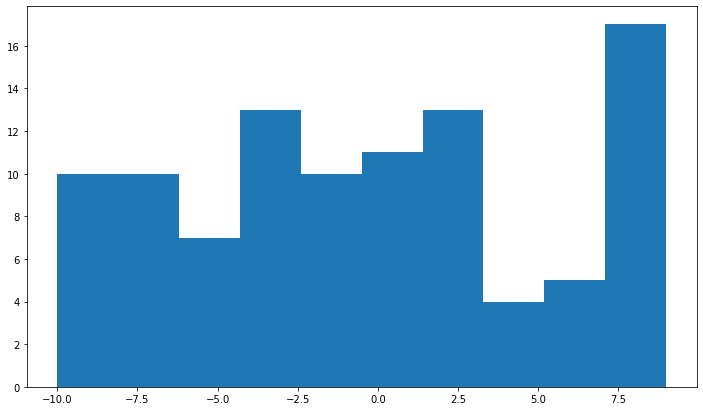

In [77]:
%timeit plt.hist(array, bins = 10)

7.14 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


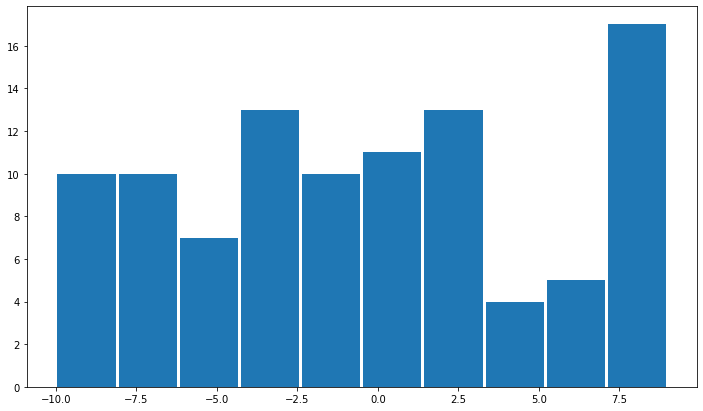

In [78]:
%timeit  fast_hist(array, 10)